In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris


In [2]:
iris = load_iris()

In [5]:
iris.keys()          # Iris data is in a Dictionary type.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [44]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:

iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['Species']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# X and Y values are
X= iris_df.drop(['Species'],axis=1)
y= iris_df['Species']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)


In [21]:
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (105, 4)
The dimension of X_test is (45, 4)


In [23]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
R_squared_Test = dt_classifier.score(X_test,y_test)
R_squared_Test

0.9777777777777777

In [37]:
R_squared_Train=dt_classifier.score(X_train,y_train)
R_squared_Train

1.0

In [26]:
ypred = dt_classifier.predict(X_test)

In [30]:
mse = mean_squared_error(y_test,ypred)
mse

0.022222222222222223

In [31]:
RMSE = mse**(1/2.0)
RMSE

0.14907119849998599

[Text(0.5416666666666666, 0.9285714285714286, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [38, 31, 36]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'X[3] <= 1.75\ngini = 0.497\nsamples = 67\nvalue = [0, 31, 36]'),
 Text(0.4166666666666667, 0.6428571428571429, 'X[2] <= 5.35\ngini = 0.208\nsamples = 34\nvalue = [0, 30, 4]'),
 Text(0.3333333333333333, 0.5, 'X[3] <= 1.65\ngini = 0.117\nsamples = 32\nvalue = [0, 30, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'X[2] <= 4.95\ngini = 0.064\nsamples = 30\nvalue = [0, 29, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.25, 0.21428571428571427, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1,

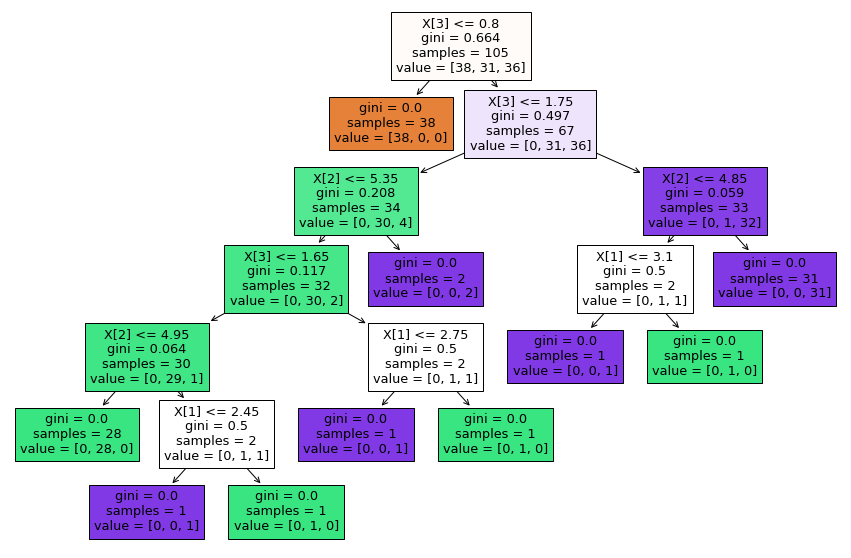

In [38]:
from sklearn import tree                  # from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))

tree.plot_tree(dt_classifier,filled=True)

##### The Model outperforms, so we are tweaking in the model.

In [41]:
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=5)  # The default classifier is Gini, here it is changed to Entropy and max depth upto which the tree is grown is given as 5.
dt_classifier.fit(X_train,y_train)

R_squared_Train=dt_classifier.score(X_train,y_train)
print('R_squared_Train =',R_squared_Train)

R_squared_Test = dt_classifier.score(X_test,y_test)
print('R_squared_Test =',R_squared_Test)

ypred = dt_classifier.predict(X_test)

mse = mean_squared_error(y_test,ypred)
print('MSE =' ,mse)

RMSE = mse**(1/2.0)
print('RMSE =',RMSE)

R_squared_Train = 0.9809523809523809
R_squared_Test = 0.9777777777777777
MSE = 0.022222222222222223
RMSE = 0.14907119849998599


In [ ]:
# When doing classification problems always check confusion matrix first and then come to final result.

In [ ]:
# Use the same dataset and do logistic regression.
# use Decision tree in Breast cancer, wine quality data set and check accuracy.